In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('datasetforproject_UPDATED.csv')
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0,Benign
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0,Benign
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0,Benign
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0,Benign


<AxesSubplot:>

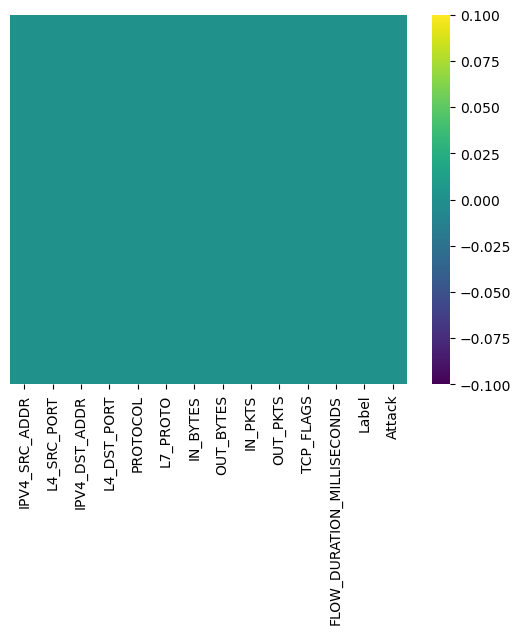

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [3]:
data.isnull().sum()

IPV4_SRC_ADDR                 0
L4_SRC_PORT                   0
IPV4_DST_ADDR                 0
L4_DST_PORT                   0
PROTOCOL                      0
L7_PROTO                      0
IN_BYTES                      0
OUT_BYTES                     0
IN_PKTS                       0
OUT_PKTS                      0
TCP_FLAGS                     0
FLOW_DURATION_MILLISECONDS    0
Label                         0
Attack                        0
dtype: int64

In [4]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [ ]:
correlation_matrix = data.corr()

correlation_matrix


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
L4_SRC_PORT,1.000000,-0.579165,-0.026594,-0.019496,-0.158862,0.020828,-0.041111,0.017923,0.070820,-0.009612,0.493478
L4_DST_PORT,-0.579165,1.000000,0.094429,0.009308,0.226895,-0.037363,0.069088,-0.025714,-0.097315,0.005933,-0.786651
PROTOCOL,-0.026594,0.094429,1.000000,0.147174,-0.024326,-0.053905,-0.086837,-0.088896,-0.879602,-0.004511,-0.318159
L7_PROTO,-0.019496,0.009308,0.147174,1.000000,0.014434,0.010162,0.026099,-0.008694,-0.190828,0.019830,-0.255559
IN_BYTES,-0.158862,0.226895,-0.024326,0.014434,1.000000,0.053187,0.760369,0.376895,0.039596,0.106137,-0.175864
OUT_BYTES,0.020828,-0.037363,-0.053905,0.010162,0.053187,1.000000,0.476402,0.909959,0.087818,0.047823,-0.002313
IN_PKTS,-0.041111,0.069088,-0.086837,0.026099,0.760369,0.476402,1.000000,0.775455,0.126272,0.138573,-0.065211
OUT_PKTS,0.017923,-0.025714,-0.088896,-0.008694,0.376895,0.909959,0.775455,1.000000,0.143040,0.091993,0.001739
TCP_FLAGS,0.070820,-0.097315,-0.879602,-0.190828,0.039596,0.087818,0.126272,0.143040,1.000000,0.003066,0.319960
FLOW_DURATION_MILLISECONDS,-0.009612,0.005933,-0.004511,0.019830,0.106137,0.047823,0.138573,0.091993,0.003066,1.000000,-0.020761


<AxesSubplot:>

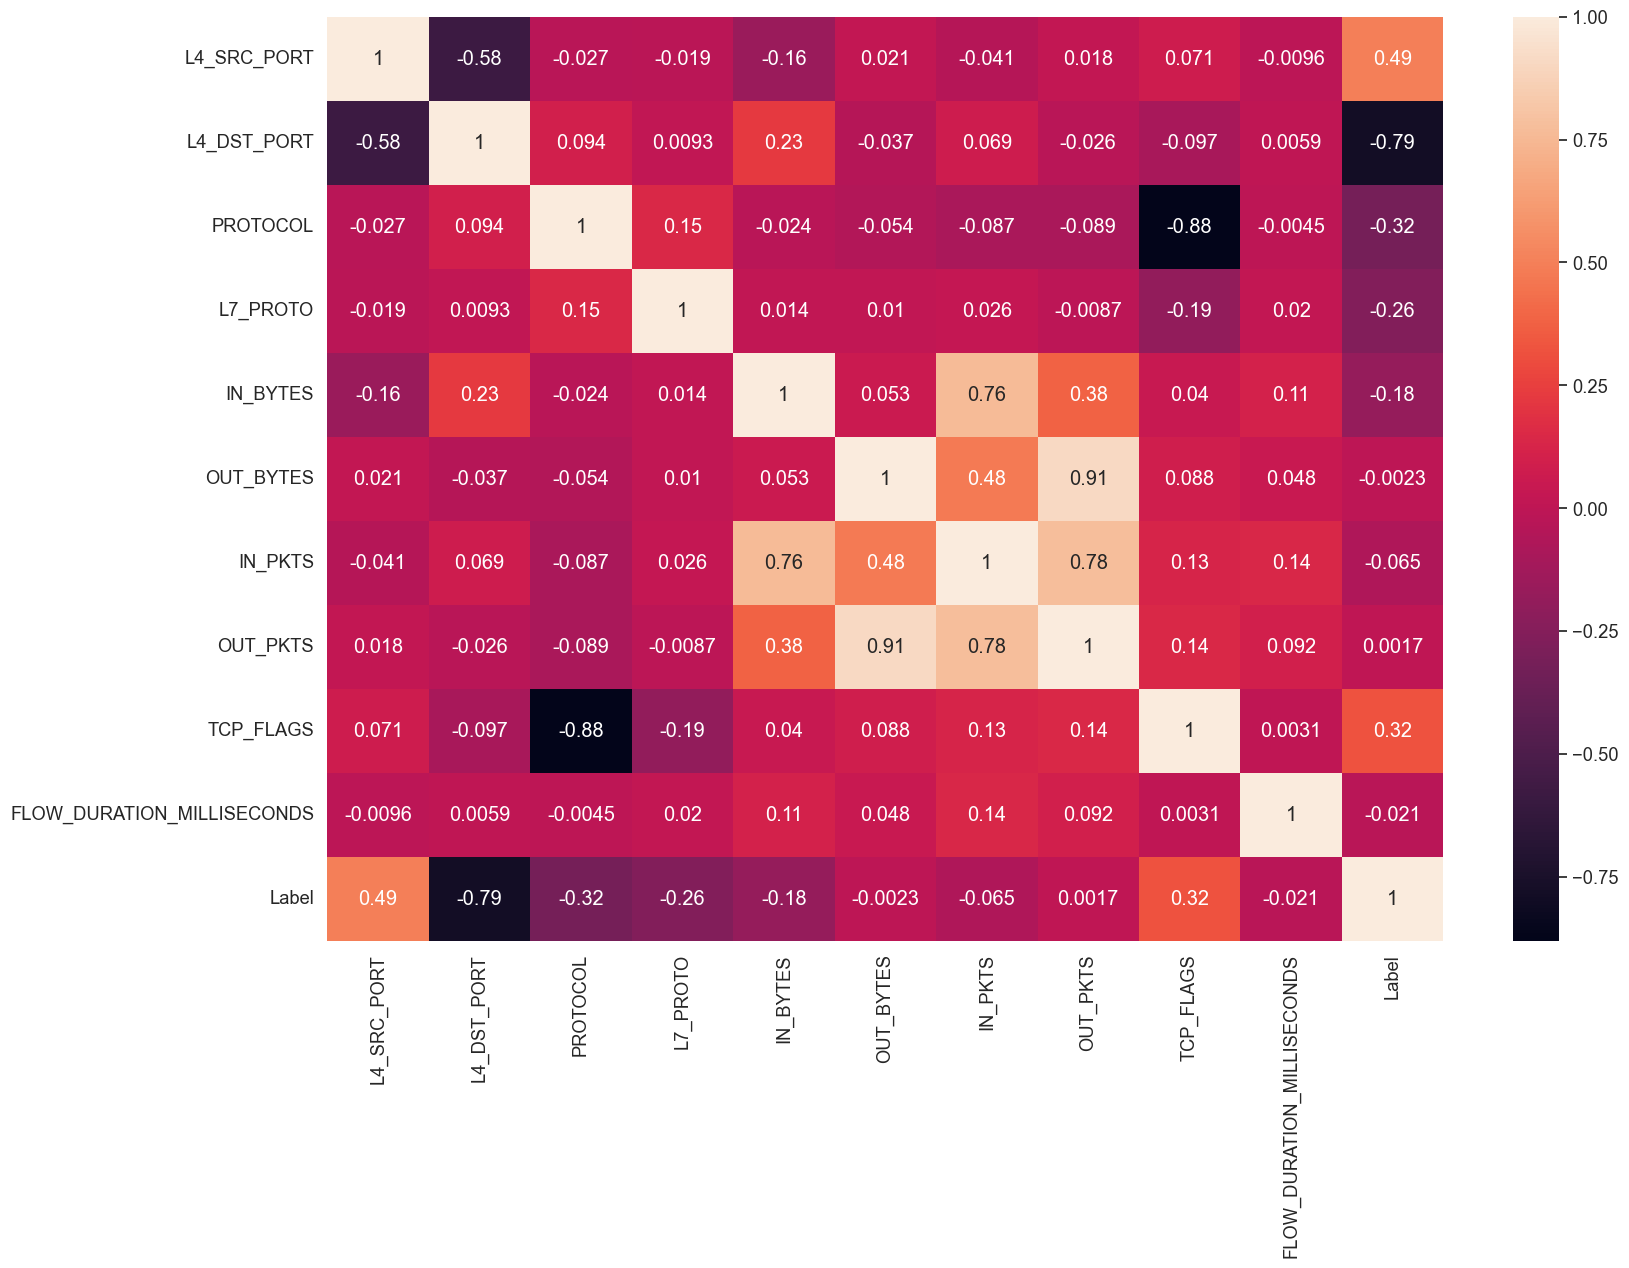

In [6]:
plt.figure(figsize=(18,12))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(), annot=True)

In [7]:
print("Correlation Values")

corr = data.corr().drop('Label')
corr.sort_values(["Label"], ascending = False, inplace = True)
print(corr.Label)

Correlation Values
L4_SRC_PORT                   0.493478
TCP_FLAGS                     0.319960
OUT_PKTS                      0.001739
OUT_BYTES                    -0.002313
FLOW_DURATION_MILLISECONDS   -0.020761
IN_PKTS                      -0.065211
IN_BYTES                     -0.175864
L7_PROTO                     -0.255559
PROTOCOL                     -0.318159
L4_DST_PORT                  -0.786651
Name: Label, dtype: float64


<AxesSubplot:xlabel='Attack', ylabel='count'>

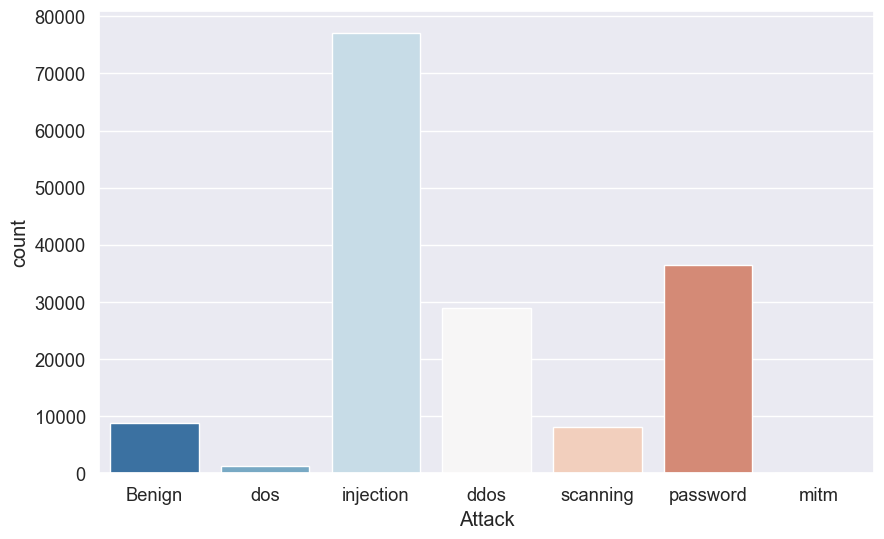

In [8]:
plt.figure(figsize=(10, 6))

sns.countplot(x = 'Attack', data = data, palette = 'RdBu_r')

<AxesSubplot:xlabel='TCP_FLAGS', ylabel='count'>

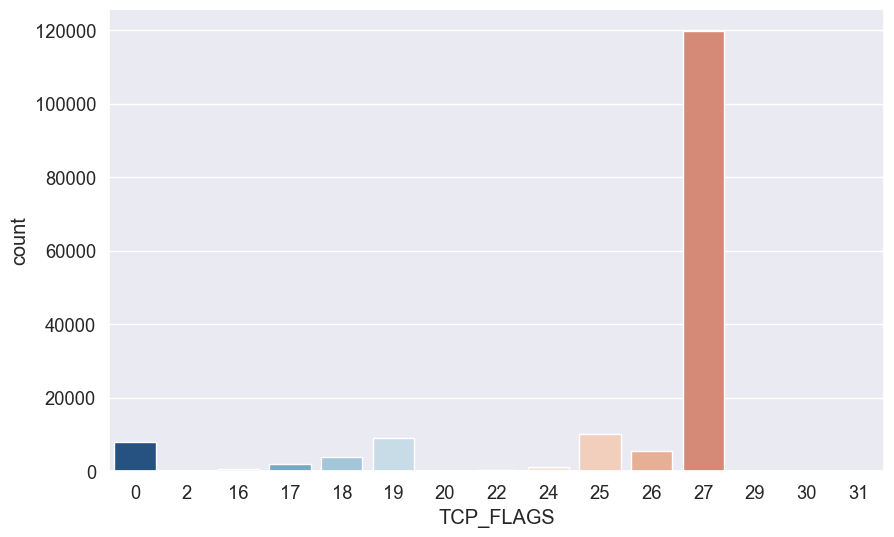

In [9]:
plt.figure(figsize=(10, 6))

sns.countplot(x = 'TCP_FLAGS', data = data, palette = 'RdBu_r')

<AxesSubplot:xlabel='PROTOCOL', ylabel='count'>

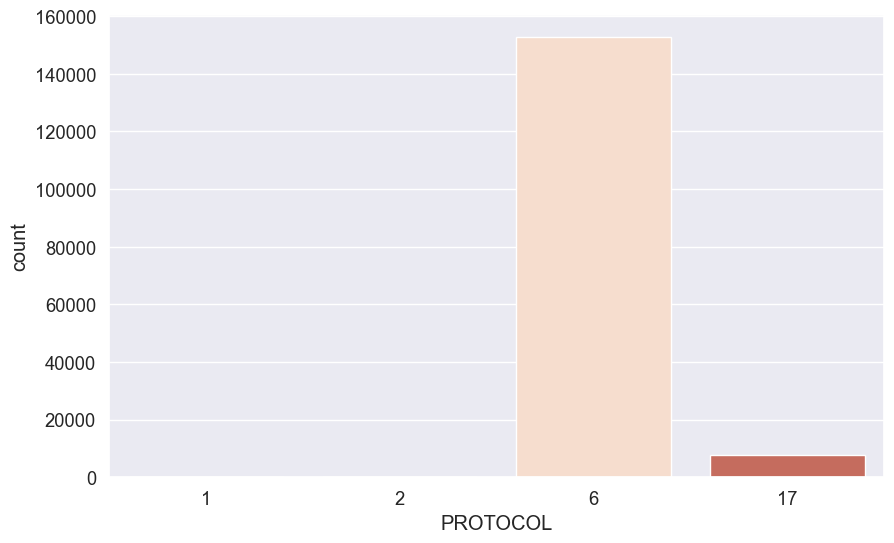

In [10]:
plt.figure(figsize=(10, 6))

sns.countplot(x = 'PROTOCOL', data = data, palette = 'RdBu_r')

In [11]:
data['Attack'].replace('Benign',0, inplace=True)
data['Attack'].replace('dos',1, inplace=True)
data['Attack'].replace('injection',2, inplace=True)
data['Attack'].replace('ddos',3, inplace=True)
data['Attack'].replace('scanning',4, inplace=True)
data['Attack'].replace('password',5, inplace=True)
data['Attack'].replace('mitm',6, inplace=True)


In [ ]:

data['Attack'] = data['Attack'].astype(int)


In [13]:
data['L7_PROTO'] = data['Attack'].astype(int)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160569 entries, 0 to 160568
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   IPV4_SRC_ADDR               160569 non-null  object
 1   L4_SRC_PORT                 160569 non-null  int64 
 2   IPV4_DST_ADDR               160569 non-null  object
 3   L4_DST_PORT                 160569 non-null  int64 
 4   PROTOCOL                    160569 non-null  int64 
 5   L7_PROTO                    160569 non-null  int32 
 6   IN_BYTES                    160569 non-null  int64 
 7   OUT_BYTES                   160569 non-null  int64 
 8   IN_PKTS                     160569 non-null  int64 
 9   OUT_PKTS                    160569 non-null  int64 
 10  TCP_FLAGS                   160569 non-null  int64 
 11  FLOW_DURATION_MILLISECONDS  160569 non-null  int64 
 12  Label                       160569 non-null  int64 
 13  Attack                      1

## ANN, RNN, DT,R-FOREST, NLP(RE)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN


In [3]:
# import necessary libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import StackingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ['L4_SRC_PORT','L4_DST_PORT','TCP_FLAGS', 'PROTOCOL', 'L7_PROTO']
target = 'Label'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ['L4_SRC_PORT','L4_DST_PORT','TCP_FLAGS', 'PROTOCOL', 'L7_PROTO']
target = 'Label'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from keras import backend as K


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model = Sequential()
model.add(Dense(units=4, activation='softmax', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10,batch_size=128, validation_split=0.1)


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")




Epoch 1/10
791/791 [==============================] - 3s 3ms/step - loss: 0.3407 - accuracy: 0.9439 - val_loss: 0.2271 - val_accuracy: 0.9404
Epoch 2/10
791/791 [==============================] - 2s 3ms/step - loss: 0.1682 - accuracy: 0.9439 - val_loss: 0.1280 - val_accuracy: 0.9404
Epoch 3/10
791/791 [==============================] - 2s 3ms/step - loss: 0.1003 - accuracy: 0.9439 - val_loss: 0.0808 - val_accuracy: 0.9404
Epoch 4/10
791/791 [==============================] - 2s 3ms/step - loss: 0.0649 - accuracy: 0.9439 - val_loss: 0.0535 - val_accuracy: 0.9404
Epoch 5/10
791/791 [==============================] - 2s 2ms/step - loss: 0.0433 - accuracy: 0.9439 - val_loss: 0.0361 - val_accuracy: 0.9404
Epoch 6/10
791/791 [==============================] - 2s 3ms/step - loss: 0.0294 - accuracy: 0.9439 - val_loss: 0.0246 - val_accuracy: 0.9404
Epoch 7/10
791/791 [==============================] - 2s 3ms/step - loss: 0.0200 - accuracy: 0.9439 - val_loss: 0.0168 - val_accuracy: 0.9404
Epoch 

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ['L4_SRC_PORT','L4_DST_PORT','TCP_FLAGS', 'PROTOCOL', 'L7_PROTO']
target = 'Label'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(SimpleRNN(units=1, activation='softmax', input_shape=(1, X_train.shape[1])))  # RNN layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_rnn, y_train, epochs=10, batch_size=128, validation_split=0.3)

loss, accuracy = model.evaluate(X_test_rnn, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = (model.predict(X_test_rnn) > 0.5).astype("int32")  
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Epoch 1/10
615/615 [==============================] - 3s 3ms/step - loss: 0.8563 - accuracy: 0.9438 - val_loss: 0.8692 - val_accuracy: 0.9430
Epoch 2/10
615/615 [==============================] - 2s 3ms/step - loss: 0.8563 - accuracy: 0.9438 - val_loss: 0.8692 - val_accuracy: 0.9430
Epoch 3/10
615/615 [==============================] - 2s 3ms/step - loss: 0.8563 - accuracy: 0.9438 - val_loss: 0.8692 - val_accuracy: 0.9430
Epoch 4/10
615/615 [==============================] - 2s 3ms/step - loss: 0.8563 - accuracy: 0.9438 - val_loss: 0.8692 - val_accuracy: 0.9430
Epoch 5/10
615/615 [==============================] - 2s 3ms/step - loss: 0.8563 - accuracy: 0.9438 - val_loss: 0.8692 - val_accuracy: 0.9430
Epoch 6/10
615/615 [==============================] - 2s 3ms/step - loss: 0.8563 - accuracy: 0.9438 - val_loss: 0.8692 - val_accuracy: 0.9430
Epoch 7/10
615/615 [==============================] - 2s 3ms/step - loss: 0.8563 - accuracy: 0.9438 - val_loss: 0.8692 - val_accuracy: 0.9430
Epoch 

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ['L4_SRC_PORT','L4_DST_PORT','TCP_FLAGS', 'PROTOCOL', 'L7_PROTO']
target = 'Label'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(max_features=1, max_depth=1, n_estimators=1, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9472504203774055
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2541
           1       0.95      1.00      0.97     45630

    accuracy                           0.95     48171
   macro avg       0.47      0.50      0.49     48171
weighted avg       0.90      0.95      0.92     48171



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = ['L4_SRC_PORT','L4_DST_PORT','TCP_FLAGS', 'PROTOCOL', 'L7_PROTO']
target = 'Label'

X = data[features]

y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = LinearSVC(C=0.00001, max_iter=1000, penalty='l2', dual=False, tol=1e-1, intercept_scaling=0.1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9276712540590691
